<a href="https://colab.research.google.com/github/guilhermeaugusto9/sigmoidal/blob/master/03_Estudo_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt = "Colaboratory logo" width = "15%" src = "https://github.com/guilhermeaugusto9/sigmoidal/raw/master/03%20-%20Outros/Logo%20Guilherme%20Augusto.png"></center>

#### **Data Science e Análise de dados**
*by [Guilherme Augusto](https://github.com/guilhermeaugusto9)

---

# Análise Pandemia COVID- 19: Mundo , Brasil

  A COVID-19 é uma doença respiratória aguda causada pelo coronavírus da síndrome respiratória aguda grave 2 (SARS-CoV-2). A doença foi identificada pela primeira vez em Wuhan, na província de Hubei, República Popular da China, em 1 de dezembro de 2019, mas o primeiro caso foi reportado em 31 de dezembro do mesmo ano. Acredita-se que o vírus tenha uma origem zoonótica, porque os primeiros casos confirmados tinham principalmente ligações ao Mercado Atacadista de Frutos do Mar de Huanan, que também vendia animais vivos.

 Em 11 de março de 2020, a Organização Mundial da Saúde declarou o surto uma pandemia. Até 5 de julho de 2020, pelo menos 11,2 milhões de casos da doença foram confirmados em pelo menos 188 países e territórios, com grandes surtos nos Estados Unidos (mais de 2,8 milhões de casos), Brasil (mais de 1,5 milhões casos), Rússia (mais de 674 mil de casos), Índia (mais de 648 mil casos), Peru (mais de 299 000 casos). Infelizmente pelo menos 528 mil pessoas1 morreram (mais de 131 mil nos Estados Unidos, 64 mil no Brasil e 44 mil no Reino Unido, e os números de 5 de julho contam com mais de 6 milhões de curados.

<center><img alt = "Vírus" width = "80%" src = "https://exame.com/wp-content/uploads/2020/04/gettyimages-1212213054.jpg"></center>

## Rápida expansão global

A partir de meados de janeiro de 2020, ocorreram os primeiros casos confirmados fora da China continental. O primeiro caso confirmado fora da China foi na Tailândia, em 13 de janeiro. Após isso, casos da doença foram confirmados no Japão (16 de janeiro); Coreia do Sul (20 de janeiro); Taiwan e Estados Unidos (21 de janeiro); Hong Kong e Macau da China (22 de janeiro); Cingapura (23 de janeiro); França, Nepal e Vietnã (24 de janeiro); Malásia e Austrália (25 de janeiro); Canadá (26 de janeiro); Camboja (27 de janeiro); Alemanha (28 de janeiro); Finlândia, Emirados Árabes Unidos e Sri Lanka (29 de janeiro); Itália, Índia e Filipinas (30 de janeiro); Reino Unido (31 de janeiro).

No dia 10 de abril, a pandemia atingiu mais de cem mil mortes no mundo, com o número total de casos ultrapassando 1,6 milhão, de acordo com a Universidade Johns Hopkins.

No dia 15 de abril, o número de infectados pela doença ultrapassou dois milhões


<center><img alt = "Vírus" width = "80%" src = "https://cdn.pixabay.com/photo/2020/03/26/16/53/corona-4971013_960_720.jpg"></center>

# Como o mundo esta reagindo

À medida que mais países fecham suas fronteiras e declaram quarentena para impedir a disseminação do vírus, a atividade econômica afunda. Empresas dos setores mais afetados, como companhias aéreas, hotéis e restaurantes, alertam que podem quebrar. Muitos trabalhadores estão perdendo seus empregos e as bolsas ainda estão em queda livre.

Os governos estão aplicando restrições à livre circulação nas ruas — medidas que não não vistas desde a Segunda Guerra Mundial. E, embora o epicentro da crise da saúde esteja na Europa, os Estados Unidos já declararam estado de emergência. Na América Latina, os países com as pessoas mais infectadas estão seguindo o mesmo caminho.

Como não se sabe por quanto tempo a pandemia pode se espalhar, é difícil para as autoridades calcular quanto dinheiro podem injetar nas economias e que medidas emergenciais podem ser adotadas para mitigar os efeitos mais imediatos sobre a renda das pessoas.

A Organização Internacional do Trabalho (OIT) alertou que a pandemia pode acabar com até 24,7 milhões de empregos em todo o mundo, excedendo os efeitos da crise financeira de 2008, que desencadeou a eliminação 22 milhões postos de trabalho.

"Não é mais apenas uma crise global de saúde, é uma grave crise econômica e trabalhista que está causando forte impacto nas pessoas", disse Guy Ryder, diretor-geral da OIT.

# Motivação para a análise

A partir de todos os fatos expostos é quase um dever cívico de todo cidadão estar bem informado sobre a doença, para saber como se prevenir e contribuir para o verdadeiro combate que travamos, pela saúde e por nossos empregos.

# Obtenção dos dados

Os dados que serão utilizados nesta análise serão vindos do portal *Our World in Data* para estudar os cenários gerais mundiais e panorama geral brasileiro.

In [5]:
# Importando os pacotes python necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import numpy as np
import warnings
warnings.filterwarnings('ignore')
!pip install squarify -q
import squarify
import folium
import json
from branca.colormap import linear
!pip install pywaffle -q
from pywaffle import Waffle


%matplotlib inline

In [6]:
# Importar o arquivos para um dataframe

df = pd.read_csv("https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv")

# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

# Verificar as 5 primeiras entradas para observar como é a base

df.head()


Dimensões do Dataset 
Variáveis:  34 
Entradas:  31284


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


Estes simples códigos já nos deram para visualizar como é a base que iremos usar, como ela esta dividia em dias, usando ela como um todo iriamos incorrer em diversos erros de cálculo, sendo assim iremos neste momento localizar a última data disponível no dataset e trabalhar com ele

In [7]:
# verificando a data mais recente do dataset
max = df.date.max()
max
# inseri a ultima data em uma variável para facilitar a reprodutibilidade da análise, levando em conta sempre a data mais recente divulgada

'2020-07-19'

In [19]:
# definindo o novo dataset, o que será utilizado
dfa = df[df['date'] == max]
dfa.reset_index(drop=True, inplace=True)
dfa.date = pd.to_datetime(dfa.date)
dfa

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2020-07-19,35301.0,12.0,1164.0,17.0,906.820,0.308,29.901,0.437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
1,ALB,Europe,Albania,2020-07-19,4008.0,102.0,111.0,4.0,1392.731,35.444,38.571,1.390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57
2,DZA,Africa,Algeria,2020-07-19,22549.0,601.0,1068.0,11.0,514.218,13.705,24.355,0.251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88
3,AND,Europe,Andorra,2020-07-19,880.0,0.0,52.0,0.0,11389.374,0.000,673.008,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73
4,AGO,Africa,Angola,2020-07-19,687.0,49.0,29.0,0.0,20.903,1.491,0.882,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,ESH,Africa,Western Sahara,2020-07-19,766.0,0.0,1.0,0.0,1282.373,0.000,1.674,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.973300e+05,NaN,28.4,NaN,1.380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.26
205,YEM,Asia,Yemen,2020-07-19,1581.0,5.0,443.0,3.0,53.008,0.168,14.853,0.101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12
206,ZMB,Africa,Zambia,2020-07-19,2980.0,170.0,109.0,0.0,162.098,9.247,5.929,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838396e+07,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89
207,ZWE,Africa,Zimbabwe,2020-07-19,1478.0,58.0,25.0,1.0,99.442,3.902,1.682,0.067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.486293e+07,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.600,30.700,36.791,1.700,61.49


In [ ]:
# verificando os países para visualizar se existe algum totalizador ou dado desnecessário

dfa.iso_code.values

Observamos neste ponto que a base contem dois registros com dados curiosos: "OWID_WRL" e "OWID_KOS", iremos observar o que elas significam, decidir se iremos manter ou descartar os dados e a partir de então prosseguir com o estudo.

In [20]:
dfa[(dfa['iso_code'] =='OWID_KOS')]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
103,OWID_KOS,Europe,Kosovo,2020-07-19,5617.0,145.0,130.0,6.0,2906.186,75.022,67.261,3.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932774.0,168.155,NaN,NaN,NaN,9795.834,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
dfa[(dfa['iso_code']=='OWID_WRL')]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
208,OWID_WRL,NaN,World,2020-07-19,14267093.0,222224.0,601934.0,4786.0,1830.335,28.509,77.223,0.614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58


Observamos que uma das nossas dúvidas na verdade é o país Kosovo e no caso da outra dúvida sim, era um totalizador que não iremos precisar em nossa análise.

In [22]:
dfa = dfa.drop(dfa.index[[208]])
dfa

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2020-07-19,35301.0,12.0,1164.0,17.0,906.820,0.308,29.901,0.437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83
1,ALB,Europe,Albania,2020-07-19,4008.0,102.0,111.0,4.0,1392.731,35.444,38.571,1.390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
2,DZA,Africa,Algeria,2020-07-19,22549.0,601.0,1068.0,11.0,514.218,13.705,24.355,0.251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43851043.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88
3,AND,Europe,Andorra,2020-07-19,880.0,0.0,52.0,0.0,11389.374,0.000,673.008,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77265.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73
4,AGO,Africa,Angola,2020-07-19,687.0,49.0,29.0,0.0,20.903,1.491,0.882,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32866268.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,VNM,Asia,Vietnam,2020-07-19,373.0,0.0,0.0,0.0,3.832,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97338583.0,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40
204,ESH,Africa,Western Sahara,2020-07-19,766.0,0.0,1.0,0.0,1282.373,0.000,1.674,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597330.0,NaN,28.4,NaN,1.380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.26
205,YEM,Asia,Yemen,2020-07-19,1581.0,5.0,443.0,3.0,53.008,0.168,14.853,0.101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29825968.0,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12
206,ZMB,Africa,Zambia,2020-07-19,2980.0,170.0,109.0,0.0,162.098,9.247,5.929,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18383956.0,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89


# Dicionário de dados

A base de dados principal que estamos utilizando é muito bem documentado e já possuia em seu repositório a descrição de cada coluna: 


Column|Description|Source
------|-----------|------
`iso_code`|ISO 3166-1 alpha-3 – three-letter country codes|International Organization for Standardization
`continent`|Continent of the geographical location|Our World in Data
`location`|Geographical location|Our World in Data
`date`|Date of observation|Our World in Data
`total_cases`|Total confirmed cases of COVID-19|European Centre for Disease Prevention and Control
`new_cases`|New confirmed cases of COVID-19|European Centre for Disease Prevention and Control
`total_deaths`|Total deaths attributed to COVID-19|European Centre for Disease Prevention and Control
`new_deaths`|New deaths attributed to COVID-19|European Centre for Disease Prevention and Control
`total_cases_per_million`|Total confirmed cases of COVID-19 per 1,000,000 people|European Centre for Disease Prevention and Control
`new_cases_per_million`|New confirmed cases of COVID-19 per 1,000,000 people|European Centre for Disease Prevention and Control
`total_deaths_per_million`|Total deaths attributed to COVID-19 per 1,000,000 people|European Centre for Disease Prevention and Control
`new_deaths_per_million`|New deaths attributed to COVID-19 per 1,000,000 people|European Centre for Disease Prevention and Control
`total_tests`|Total tests for COVID-19|National government reports
`new_tests`|New tests for COVID-19|National government reports
`new_tests_smoothed`|New tests for COVID-19 (7-day smoothed). For countries that don't report testing data on a daily basis, we assume that testing changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window|National government reports
`total_tests_per_thousand`|Total tests for COVID-19 per 1,000 people|National government reports
`new_tests_per_thousand`|New tests for COVID-19 per 1,000 people|National government reports
`new_tests_smoothed_per_thousand`|New tests for COVID-19 (7-day smoothed) per 1,000 people|National government reports
`tests_units`|Units used by the location to report its testing data|National government reports
`stringency_index`|Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)|Oxford COVID-19 Government Response Tracker, Blavatnik School of Government
`population`|Population in 2020|United Nations, Department of Economic and Social Affairs, Population Division, World Population Prospects: The 2019 Revision
`population_density`|Number of people divided by land area, measured in square kilometers, most recent year available|World Bank – World Development Indicators, sourced from Food and Agriculture Organization and World Bank estimates
`median_age`|Median age of the population, UN projection for 2020|UN Population Division, World Population Prospects, 2017 Revision
`aged_65_older`|Share of the population that is 65 years and older, most recent year available|World Bank – World Development Indicators, based on age/sex distributions of United Nations Population Division's World Population Prospects: 2017 Revision
`aged_70_older`|Share of the population that is 70 years and older in 2015|United Nations, Department of Economic and Social Affairs, Population Division (2017), World Population Prospects: The 2017 Revision
`gdp_per_capita`|Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available|World Bank – World Development Indicators, source from World Bank, International Comparison Program database
`extreme_poverty`|Share of the population living in extreme poverty, most recent year available since 2010|World Bank – World Development Indicators, sourced from World Bank Development Research Group
`cvd_death_rate`|Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)|Global Burden of Disease Collaborative Network, Global Burden of Disease Study 2017 Results
`diabetes_prevalence`|Diabetes prevalence (% of population aged 20 to 79) in 2017|World Bank – World Development Indicators, sourced from International Diabetes Federation, Diabetes Atlas
`female_smokers`|Share of women who smoke, most recent year available|World Bank – World Development Indicators, sourced from World Health Organization, Global Health Observatory Data Repository
`male_smokers`|Share of men who smoke, most recent year available|World Bank – World Development Indicators, sourced from World Health Organization, Global Health Observatory Data Repository
`handwashing_facilities`|Share of the population with basic handwashing facilities on premises, most recent year available|United Nations Statistics Division
`hospital_beds_per_thousand`|Hospital beds per 1,000 people, most recent year available since 2010|OECD, Eurostat, World Bank, national government records and other sources
`life_expectancy`|Life expectancy at birth in 2019|James C. Riley, Clio Infra, United Nations Population Division

## Análise Exploratória dos Dados

Iremos iniciar agora, após os devidos ajustes na base, que ressalto: É uma parte importantíssima de qualquer análise de dados e pode representar até 70% de todo tempo de um projeto.

Para facilitar a análse iremos apresentar os dados por meio de perguntas:

* **Q1. Quais os três países com mais casos na ultima data disponível?**
* **Q2. Quais os tres países com maior número de mortes?**
* **Q3. Como o vírus está progredindo?**
* **Q4. Quando foi identificado o primeiro caso e a primeira morte no Brasil ?**
* **Q5. Quanto tempo levou entre a primeira morte e o primeiro caso no Brasil?**
* **Q6.Qual a correlação entre as variáveis disponíveis na base de dados?**


# Q1. Quais os três países com mais casos na ultima data disponível?

In [23]:
# total de casos
df.loc[df.date == max].sort_values(by="total_cases", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
31219,OWID_WRL,NaN,World,2020-07-19,14267093.0,222224.0,601934.0,4786.0,1830.335,28.509,77.223,0.614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58
29762,USA,North America,United States,2020-07-19,3711464.0,63749.0,140119.0,853.0,11212.793,192.594,423.317,2.577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
4216,BRA,South America,Brazil,2020-07-19,2074860.0,28532.0,78772.0,921.0,9761.318,134.231,370.588,4.333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
13271,IND,Asia,India,2020-07-19,1077618.0,38902.0,26816.0,543.0,780.880,28.190,19.432,0.393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.55,0.530,69.66
23608,RUS,Europe,Russia,2020-07-19,771546.0,6109.0,12342.0,95.0,5286.935,41.861,84.572,0.651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050,72.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30259,VAT,Europe,Vatican,2020-07-19,12.0,0.0,0.0,0.0,14833.127,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.090000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12
19363,MSR,North America,Montserrat,2020-07-19,12.0,0.0,1.0,0.0,2400.480,0.000,200.040,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.999000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.16
3775,BES,North America,Bonaire Sint Eustatius and Saba,2020-07-19,10.0,0.0,0.0,0.0,381.374,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.622100e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.79
4331,VGB,North America,British Virgin Islands,2020-07-19,8.0,0.0,1.0,0.0,264.577,0.000,33.072,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.023700e+04,207.973,NaN,NaN,NaN,NaN,NaN,NaN,13.67,NaN,NaN,NaN,NaN,79.07


Pudemos verificar que os países líderes em casos aos 19 de Julho de 2020 eram:

* Estados Unidos - 3,7 milhões de casos
* Brasil - 2,07 milhões de casos
* Índia - 1,07 milhões de casos

Agora, vamos verificar os casos de morte.

# Q2. Quais os tres países com maior número de mortes?

In [24]:
# total de mortes
df.loc[df.date == max].sort_values(by="total_deaths", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
31219,OWID_WRL,NaN,World,2020-07-19,14267093.0,222224.0,601934.0,4786.0,1830.335,28.509,77.223,0.614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
29762,USA,North America,United States,2020-07-19,3711464.0,63749.0,140119.0,853.0,11212.793,192.594,423.317,2.577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
4216,BRA,South America,Brazil,2020-07-19,2074860.0,28532.0,78772.0,921.0,9761.318,134.231,370.588,4.333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
29560,GBR,Europe,United Kingdom,2020-07-19,294066.0,827.0,45273.0,40.0,4331.762,12.182,666.897,0.589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540,81.32
18671,MEX,North America,Mexico,2020-07-19,338913.0,7615.0,38888.0,578.0,2628.603,59.062,301.615,4.483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.900,21.400,87.847,1.380,75.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9846,FJI,Oceania,Fiji,2020-07-19,26.0,0.0,0.0,0.0,29.003,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.964440e+05,49.562,28.6,6.224,3.284,8702.975,1.4,412.820,14.49,10.200,34.800,NaN,2.300,67.44
22145,PNG,Oceania,Papua New Guinea,2020-07-19,15.0,0.0,0.0,0.0,1.677,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.947027e+06,18.220,22.6,3.808,2.142,3823.194,NaN,561.494,17.65,23.500,48.800,NaN,NaN,64.50
28256,TLS,Asia,Timor,2020-07-19,24.0,0.0,0.0,0.0,18.203,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.318442e+06,87.176,18.0,3.556,1.897,6570.102,30.3,335.346,6.86,6.300,78.100,28.178,5.900,69.50
10373,PYF,Oceania,French Polynesia,2020-07-19,62.0,0.0,0.0,0.0,220.716,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.809040e+05,77.324,32.7,7.775,4.593,NaN,NaN,NaN,22.63,NaN,NaN,NaN,NaN,77.66


Em relação às mortes, os países que lideravam aos 19 de Julho de 2020 eram:

Estados Unidos - 140.119

Brasil - 78.772

Grã-Bretanha - 45.273

Para melhorar a visualização, vamos plotar um gráfico de barras.

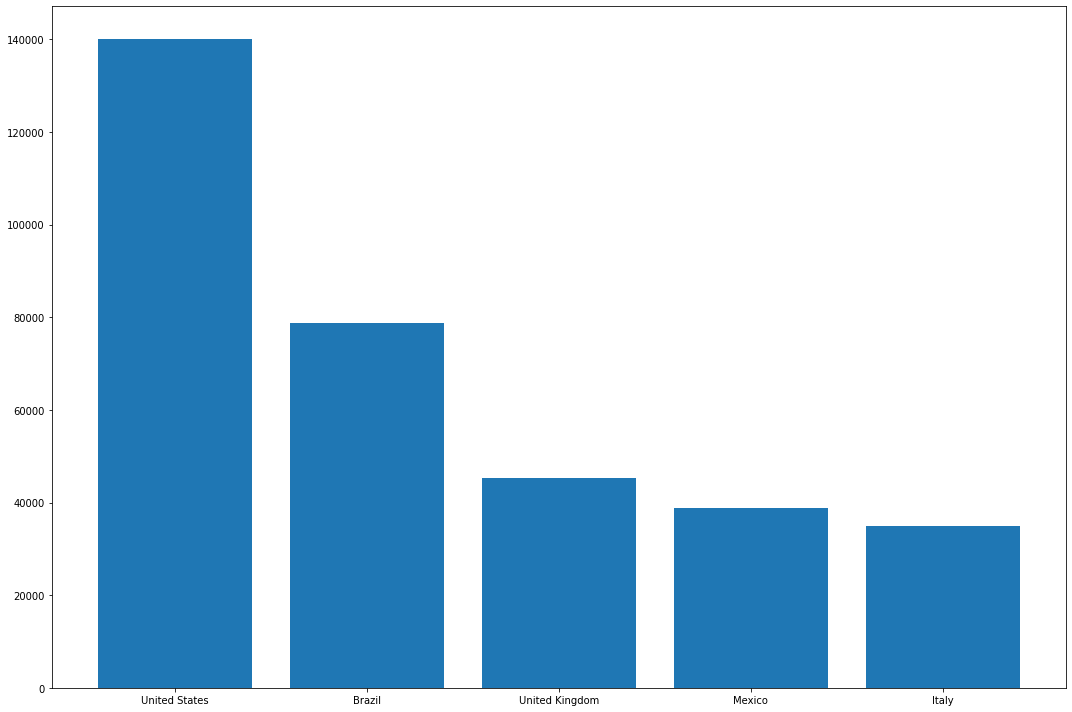

In [26]:
# gráfico de barras para total de mortes
top_5_total_deaths = df.loc[df.date == max, ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location', 'total_deaths', data=top_5_total_deaths)

plt.tight_layout()

# Q3. Como o vírus está progredindo?

Uma das maiores preocupações das organizações de saúde é a progressão do número de casos e mortes no mundo.

Uma das melhores formas de visualizarmos a evolução ao longo do tempo, é o gráfico de linhas. Por isso, vamos plotar um gráfico de linha para demonstrar e evolução de mortes no mundo.

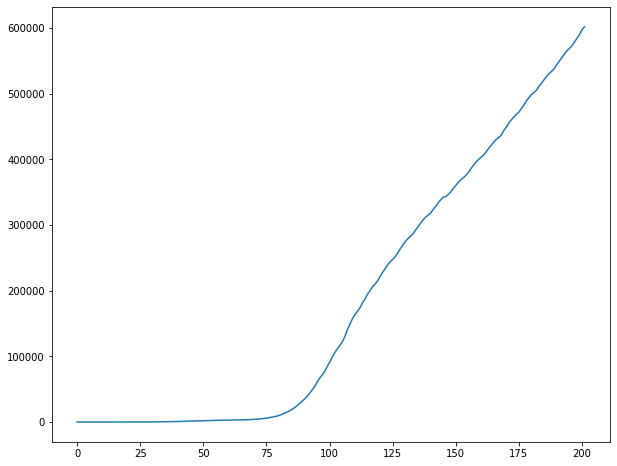

In [28]:
# gráfico de linha para mortes no mundo
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot(figsize=(10,8));

O gŕafico de linhas nesta análise evidencia que infelizmente a situação ainda é de crescimento em ritmo acelerado no número de casos do corona vírus. Visualizamos que a inclinação da curva apresentou uma redução da inclinação, é verdade, mas a redução ainda é muito pequena e sem indicativo que vivemos uma situação , em escala global, de estabilização ou que a pandemia está chegando ao seu fim.

# Q4. Quando foi identificado o primeiro caso e a primeira morte no Brasil ?

Agora que já temos uma noção dos acontecimentos no mundo, vamos focar nos acontecimentos no Brasil.


In [29]:
# Criar uma cópia do DataFrame apenas com o Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4015,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4016,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4017,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4018,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4019,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [30]:
df_brasil.date.max()

'2020-07-19'

Acima, verificamos que nosso dataset inclui datas desde 31-12-2019 até 19-07-2020.

Vamos verificar quando foram identificados o primeiro caso e a primeira morte no Brasil.

In [32]:
# identificaçãso do primeiro caso
df_brasil.loc[df_brasil['new_cases'] != 0.0].head(1)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4072,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.005,0.005,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [33]:
print('O primeiro caso foi registrado em {}'.format(df_brasil.date.loc[4072]))

O primeiro caso foi registrado em 2020-02-26


In [34]:
# primeira morte
df_brasil.loc[df_brasil['new_deaths'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4093,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [35]:
print('A primeira morte foi registrada em {}'.format(df_brasil.date.loc[4093]))

A primeira morte foi registrada em 2020-03-18


# Q5. Quanto tempo levou entre a primeira morte e o primeiro caso no Brasil?

In [47]:
# Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
# calculando tempo desde o primeiro caso até a primeira morte
from datetime import date
df_brasil.date = pd.to_datetime(df_brasil.date)


In [48]:
delta = df_brasil.date.loc[4093] - df_brasil.date.loc[4072]
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(delta.days))

Se passaram 21 dias entre o primeiro caso e a primeira morte no Brasil.


In [42]:
df.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
total_deaths                              float64
new_deaths                                float64
total_cases_per_million                   float64
new_cases_per_million                     float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
total_tests                               float64
new_tests                                 float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
tests_units                                object
stringency_index                          float64


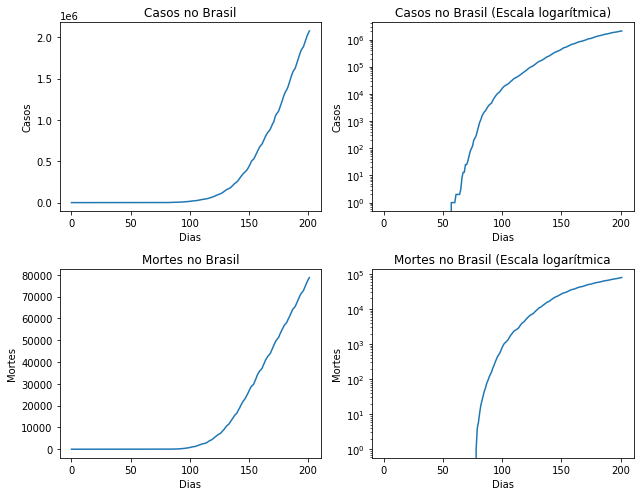

In [46]:
# Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.
x = list(range(202))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, z)

ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z2)

ax4.set_title('Mortes no Brasil (Escala logarítmica')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z2)
plt.tight_layout()

In [45]:
df_brasil.shape

(202, 34)

In [53]:
dfa.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

# Q6.Qual a correlação entre as variáveis disponíveis na base de dados?

In [56]:
corr = dfa[['total_cases','total_deaths','population','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cvd_death_rate','diabetes_prevalence','male_smokers','hospital_beds_per_thousand','life_expectancy']].corr()
display(corr)

,total_cases,total_deaths,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,male_smokers,hospital_beds_per_thousand,life_expectancy
total_cases,1.000000,0.936802,0.353641,-0.026559,0.103888,0.087386,0.083091,0.126105,-0.117409,-0.095642,0.051412,-0.083945,-0.019510,0.075048
total_deaths,0.936802,1.000000,0.295001,-0.031753,0.153361,0.166000,0.166518,0.150396,-0.140606,-0.166047,0.017692,-0.118261,-0.017135,0.126436
population,0.353641,0.295001,1.000000,-0.019190,0.026390,-0.009817,-0.020296,-0.057244,-0.038867,0.010872,0.022269,0.029213,-0.038327,-0.026522
population_density,-0.026559,-0.031753,-0.019190,1.000000,0.140513,0.064691,0.038880,0.297808,-0.028079,-0.180516,0.017166,0.001216,0.314974,0.200599
median_age,0.103888,0.153361,0.026390,0.140513,1.000000,0.913667,0.898238,0.641665,-0.699820,-0.315385,0.207331,0.206734,0.667528,0.846652
aged_65_older,0.087386,0.166000,-0.009817,0.064691,0.913667,1.000000,0.994384,0.499972,-0.573710,-0.314540,-0.009290,0.107109,0.656724,0.729744
aged_70_older,0.083091,0.166518,-0.020296,0.038880,0.898238,0.994384,1.000000,0.492344,-0.558261,-0.329556,-0.043287,0.105918,0.658969,0.716915
gdp_per_capita,0.126105,0.150396,-0.057244,0.297808,0.641665,0.499972,0.492344,1.000000,-0.504896,-0.465577,0.265246,-0.085239,0.297437,0.683830
extreme_poverty,-0.117409,-0.140606,-0.038867,-0.028079,-0.699820,-0.573710,-0.558261,-0.504896,1.000000,0.185494,-0.447155,-0.193350,-0.441399,-0.755211
cvd_death_rate,-0.095642,-0.166047,0.010872,-0.180516,-0.315385,-0.314540,-0.329556,-0.465577,0.185494,1.000000,0.014455,0.424386,0.024412,-0.476430


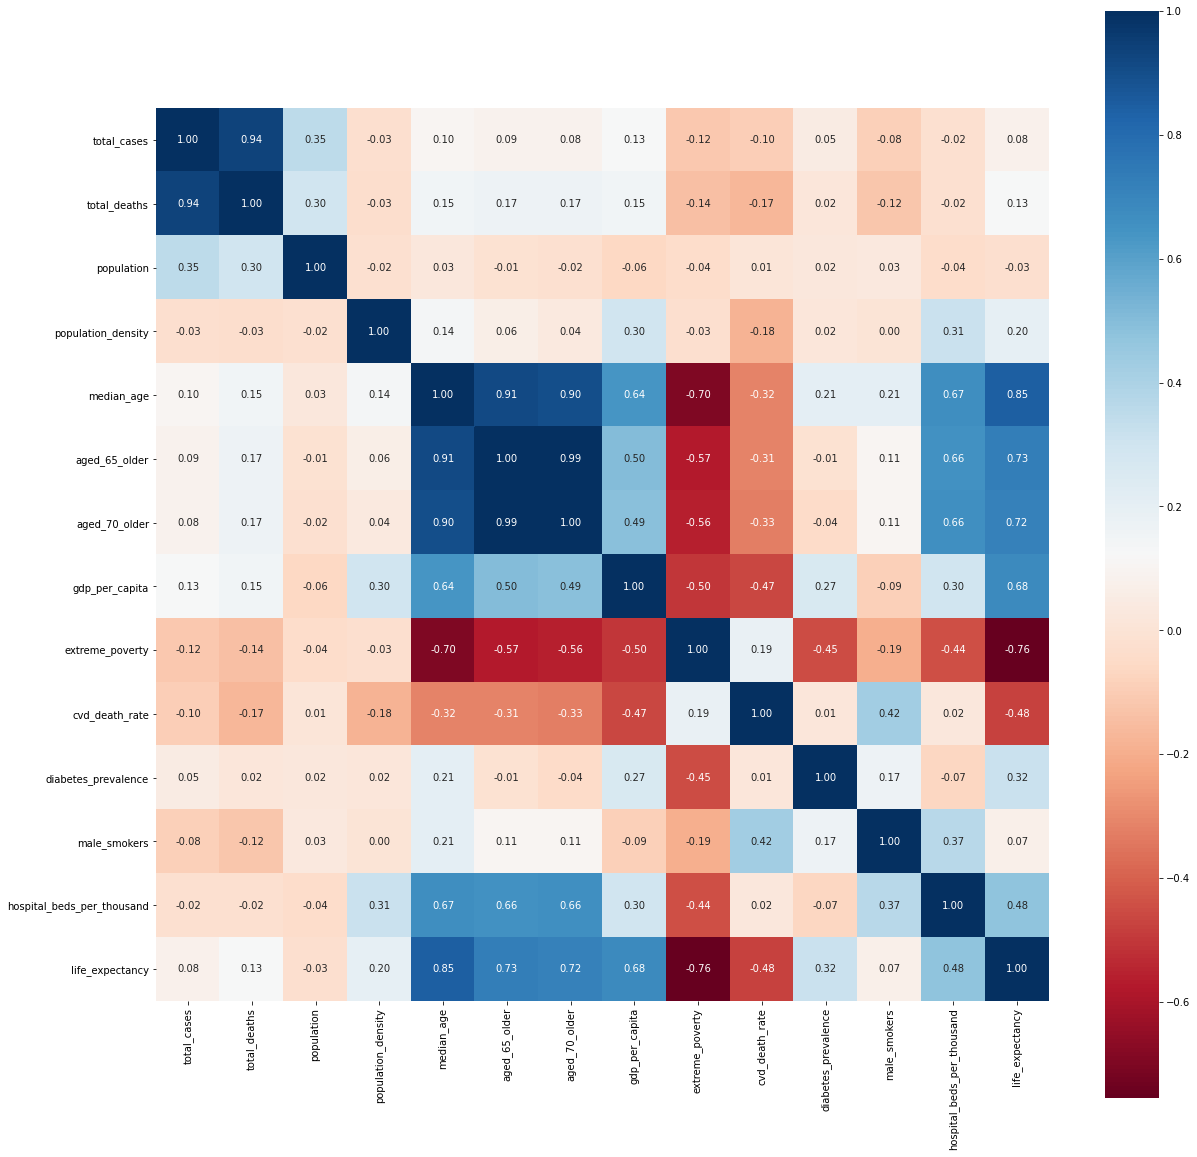

In [60]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(corr, cmap = 'RdBu', fmt='.2f', square = True , linecolor='white', annot= True,ax=ax);


## Conclusão

Um detalhe extremamente importante a ser destacado é que esses dados são medidos diariamente, e esse conjunto de dados ficará desatualizado "rapidamente".

Entretanto, levando em consideração o contexto dos dados analisados, vale a pena destacar que:

* Os Estados Unidos estão disparados em relação aos casos e mortes.
* A evolução dos casos no Brasil está em crescimento avassalador.
* No geral, casos e mortes ainda estão crescendo.

Muitas outras análises podem ser retiradas desse conjunto de dados, mas com essa análise inicial já conseguimos retirar muitas informações.